In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Alle Daten werden eingelesen die dieselbe Formatierung haben nach der vereinheitlichung durch die Umschreibung der csv files (GMT +1) gleich,
#Zeitangeben werden nur als Stunden angegeben, es gibt keine Minuten oder Sekunden angaben in files

files = [ 
"Air_temperature2015.csv",
"Air_temperature2016.csv",
"Air_temperature2017.csv",
"Air_temperature2018.csv",
"Air_temperature2019.csv",
"Air_temperature2020.csv",
"Air_temperature2021.csv",
#"Air_temperature2022.csv",
#"Air_temperature2022.csv",
#"Air_temperature2023.csv",
#"Air_temperature2024.csv",
"Relative_humidity2015.csv",
"Relative_humidity2016.csv",
"Relative_humidity2017.csv",
"Relative_humidity2018.csv",
"Relative_humidity2019.csv",
"Relative_humidity2020.csv",
"Relative_humidity2021.csv",
#"Relative_humidity2022.csv",
#"Relative_humidity2023.csv",
#"Relative_humidity2024.csv",
"Wind_Speed2015.csv",
"Wind_Speed2016.csv",
"Wind_Speed2017.csv",
"Wind_Speed2018.csv",
"Wind_Speed2019.csv",
#"Wind_Speed2022.csv",
"Wind_Speed2020.csv",
"Wind_Speed2021.csv",
#"Wind_Speed2022.csv",
#"Wind_Speed2023.csv",
#"Wind_Speed2024.csv",
#"Wind_direction2015.csv",
#"Wind_direction2016.csv",
#"Wind_direction2017.csv",
#"Wind_direction2018.csv",
#"Wind_direction2019.csv",
#"Wind_direction2020.csv",
#"Wind_direction2021.csv",
#"Wind_direction2022.csv",
#"Wind_direction2023.csv",
#"Wind_direction2024.csv",

"Diffuse_solar_radiation2015.csv",
"Diffuse_solar_radiation2016.csv",
"Diffuse_solar_radiation2017.csv",
"Diffuse_solar_radiation2018.csv",
"Diffuse_solar_radiation2019.csv",
"Diffuse_solar_radiation2020.csv",
"Diffuse_solar_radiation2021.csv"
#"Diffuse_solar_radiation2022.csv"
#"Diffuse_solar_radiation2023.csv","""


   
]

#files elect hingegen hat Minuten angaben was dazu führt das leere rows entsthen, mit NaN values , um dagegen zu wirken habe ich die Zeit auf Stunden gerundet
#und die einzelnen values wie humidity , solar_radiation nach dem Datum sortiert
files_elect = [    "wind_electricity_generation_in_Germany_in_2015.csv",
"wind_electricity_generation_in_Germany_in_2016.csv",
"wind_electricity_generation_in_Germany_in_2017.csv",
"wind_electricity_generation_in_Germany_in_2018.csv",
"wind_electricity_generation_in_Germany_in_2019.csv",
"wind_electricity_generation_in_Germany_in_2020.csv",
"wind_electricity_generation_in_Germany_in_2021.csv",
#"wind_electricity_generation_in_Germany_in_2022.csv"

#"wind_electricity_generation_in_Germany_in_2023.csv"
#"wind_electricity_generation_in_Germany_in_2024.csv"   
              ]

import pandas as pd


# Definiert eine Funktion, um eine Liste von csv Dateien für eine einzelne Variable zu verarbeiten
def process_df(files, variable_name):
  
    variable_df = pd.DataFrame()
    
   
    for file in files:
        # Liest die aktuelle CSV-Datei in einen DataFrame.
        df = pd.read_csv(file)
        # Konvertieren der Spalte 'Date (GMT+1)' in ein einheitliches Zeitformat ,rundung auf die nächste Stunde.
        df['Date (GMT+1)'] = pd.to_datetime(df['Date (GMT+1)']).dt.round('H')
        # Gruppiert nach 'Date (GMT+1)', um Duplikate zu entfernen und  den Mittelwert der Werte zu erechnen. 
        # Der Durchschnitt dieser Messungen  wird mit mean() berechnet, um einen einzelnen Wert pro Stunde zu erhalten.
        df = df.groupby('Date (GMT+1)').mean()
        # Wenn mehrere Spalten vorhanden sind, wählt die zweite Spalte (angenommen, es ist die Datenspalte).
        if len(df.columns) > 1:
            df = df.iloc[:, [1]]
        # Benennt die Spalte um in den gegebenen Variablennamen.
        df.columns = [variable_name]
        # Verkettet den aktuellen DataFrame mit dem Variable DataFrame am Index.
        variable_df = pd.concat([variable_df, df], axis=1)
    
    # Nach dem Zusammenführen aller Dateien berechnet den Mittelwert über die Spalten, um sie zu konkatenieren.
    variable_df = variable_df.mean(axis=1)
    # Gibt die zusammengefassten Daten für die Variable als DataFrame zurück.
    return variable_df.to_frame(name=variable_name)

# Verarbeitet die Daten jeder Variablen, indem die Dateinamen gefiltert und die Funktion aufgerufen wird.
temperature_df = process_df([f for f in files if "Air_temperature" in f], "Air_temperature")
#wind_direction_df = process_df([f for f in files if "Wind_direction" in f], "Wind_direction")
humidity_df = process_df([f for f in files if "Relative_humidity" in f], "Relative_humidity")
electricity_df = process_df(files_elect, "Wind onshore")
wind_df = process_df([f for f in files if "Wind_Speed" in f], "Wind_Speed")
diffuse_df = process_df([f for f in files if "Diffuse_solar_radiation" in f], "Diffuse_solar_radiation")
#wind_direction_df = process_df([f for f in files if "Wind_direction" in f], "Wind_direction")


# Kombiniert die verarbeiteten DataFrames für jede Variable zu einem einzigen vollständigen DataFrame.
complete_data = pd.concat([ temperature_df,  humidity_df, electricity_df ,wind_df ], axis=1)

complete_data['Hour'] = complete_data.index.hour
complete_data['Month'] = complete_data.index.month


def add_season_column(df):
    # Erstellt eine neue Spalte 'Season' und initialisiere es mit 'Winter'
    # Es schließt den Monat Dezember des letzten Jahres mit ein.
    df['Jahreszeit'] = 'Winter'
    
    # Hier Jahreszeiten definieren
    df.loc[df.index.month.isin([3, 4, 5]), 'Jahreszeit'] = 'Frühling'
    df.loc[df.index.month.isin([6, 7, 8]), 'Jahreszeit'] = 'Sommer'
    df.loc[df.index.month.isin([9, 10, 11]), 'Jahreszeit'] = 'Herbst'
    
    return df

jahreszeit = add_season_column(complete_data.copy())
# Füge die Daten in der Spalte 'Season' hinzu.

# Zeigt den endgültigen kombinierten DataFrame mit allen Variablen an.
complete_data = jahreszeit


season_to_numeric = {
    'Winter': 0,
    'Frühling': 1,
    'Sommer': 2,
    'Herbst': 3
}

# Ersetze die 'Jahreszeit' Spalte durch numerische Werte.
complete_data['Jahreszeit'] = complete_data['Jahreszeit'].replace(season_to_numeric)

# Show the DataFrame to confirm the changes
complete_data

new_Data = complete_data.head(24)

new_Data


,Air_temperature,Relative_humidity,Wind onshore,Wind_Speed,Hour,Month,Jahreszeit
Date (GMT+1),,,,,,,
2014-12-31 23:00:00,NaN,NaN,8964.625,NaN,23,12,0
2015-01-01 00:00:00,NaN,NaN,9163.850,NaN,0,1,0
2015-01-01 01:00:00,1.638710,89.290323,9315.850,3.4,1,1,0
2015-01-01 02:00:00,1.577419,89.580645,9265.600,3.4,2,1,0
2015-01-01 03:00:00,1.519355,89.741935,9323.525,3.4,3,1,0
2015-01-01 04:00:00,1.461290,89.838710,9634.875,3.3,4,1,0
2015-01-01 05:00:00,1.425806,89.870968,10159.025,3.4,5,1,0
2015-01-01 06:00:00,1.393548,89.903226,10699.375,3.5,6,1,0
2015-01-01 07:00:00,1.383871,89.935484,10674.300,3.4,7,1,0


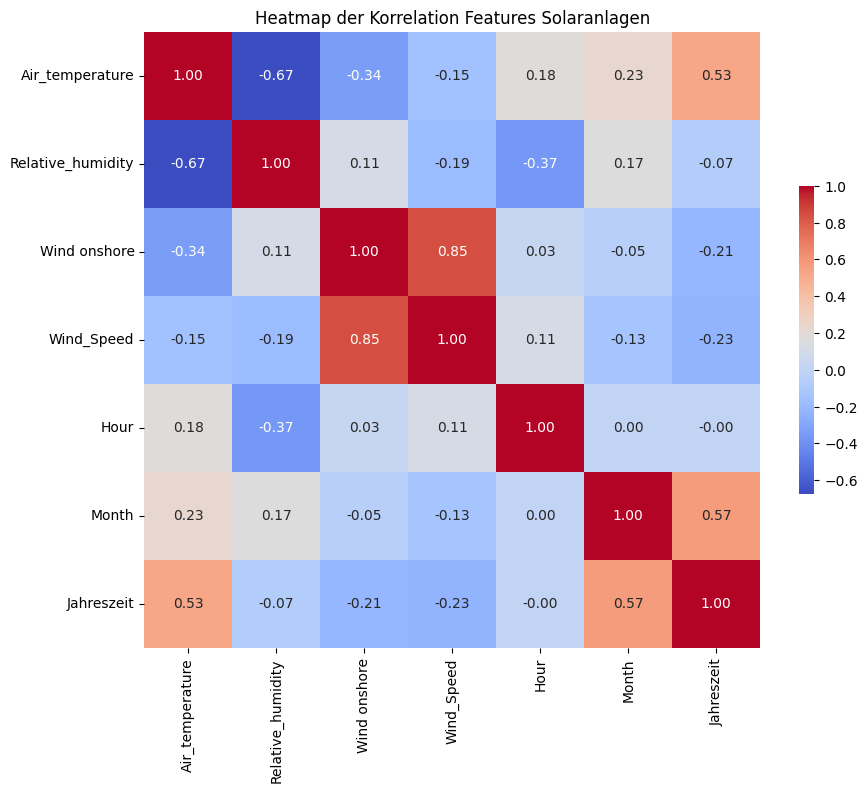

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Berechnung der Korrelationsmatrix
matrix = complete_data.corr()

# Verwenden von Seaborn, um eine Heatmap der Korrelationsmatrix zu erstellen
plt.figure(figsize=(10, 8))  
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})


plt.title('Heatmap der Korrelation Features Solaranlagen')  

# Anzeige des Plots
plt.show()

In [4]:
complete_data.describe().transpose() # Überprüfung ob Korrektur vorgenommen werden muss an den Values in den Columns , die Daten scheinen 
# keine besonderen Auffäligkeiten , jedoch ist Diffuse- und Global_solar_radiation eins eins die selbe csv file.

#Das Duplikat wird entfernt
complete_data.describe().transpose() # Überprüfung von Korrektur vorgenommen werden muss an den Values in den Columns , die Datei
# keine besonderen Auffälligkeiten , jedoch ist Diffuse- und Global_solar_radiation eins die selbe csv file.

# Das Duplikat wird entfernt

if 'Global_solar_radiation' in complete_data.columns:
    complete_data = complete_data.drop('Global_solar_radiation', axis=1)
else:
    print("Column does not exist in DataFrame")

if 'Wind_Speed' in complete_data.columns:
    complete_data = complete_data.drop('Wind_Speed', axis=1)
else:
    print("Column does not exist in DataFrame")

complete_data


Column does not exist in DataFrame


,Air_temperature,Relative_humidity,Wind onshore,Hour,Month,Jahreszeit
Date (GMT+1),,,,,,
2014-12-31 23:00:00,NaN,NaN,8964.625,23,12,0
2015-01-01 00:00:00,NaN,NaN,9163.850,0,1,0
2015-01-01 01:00:00,1.638710,89.290323,9315.850,1,1,0
2015-01-01 02:00:00,1.577419,89.580645,9265.600,2,1,0
2015-01-01 03:00:00,1.519355,89.741935,9323.525,3,1,0
...,...,...,...,...,...,...
2021-12-31 20:00:00,NaN,NaN,27503.775,20,12,0
2021-12-31 21:00:00,NaN,NaN,26663.350,21,12,0
2021-12-31 22:00:00,NaN,NaN,25401.250,22,12,0


C:\Users\Nikita\AppData\Local\Temp\ipykernel_1544\501667182.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = violin.set_xticklabels(complete_data.keys(), rotation=90)


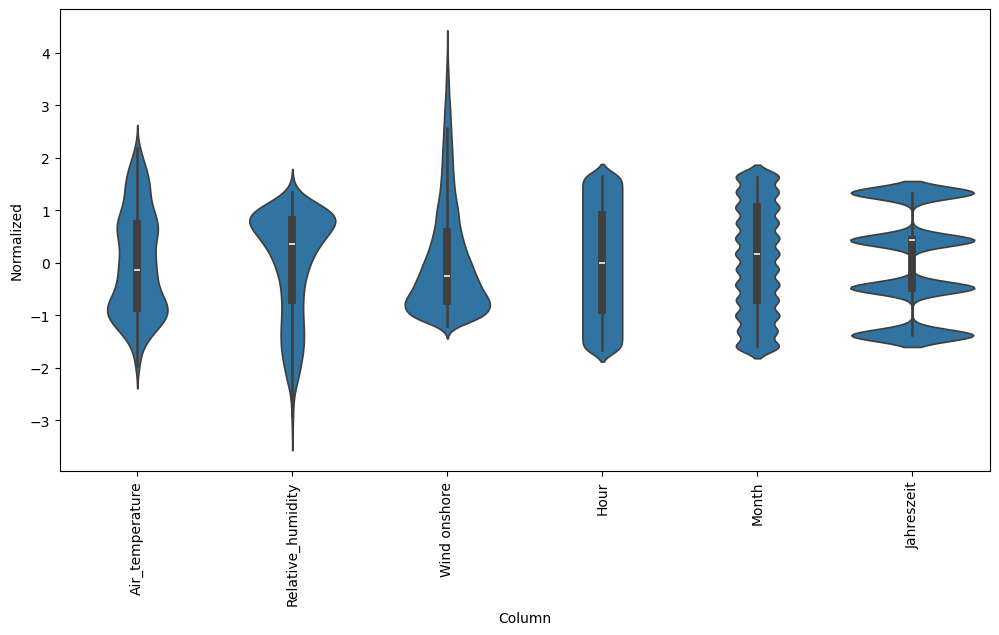

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bestimmung der Länge des kompletten Datensatzes
n = len(complete_data)

# Aufteilung des Datensatzes in Training, Validierung und Test
# 70% der Daten für das Training, 20% für die Validierung, 10% für den Test
trainDF = complete_data[0:int(n*0.7)]
valDF = complete_data[int(n*0.7):int(n*0.9)]
testDF = complete_data[int(n*0.9):]

# Berechnung des Mittelwerts und der Standardabweichung des Trainingsdatensatzes
train_mean = trainDF.mean()
train_std = trainDF.std()

# Anzahl der Features (Spalten) im Datensatz
featuresAnzahl = complete_data.shape[1]

# Normalisierung der Trainings- Validierungs- und Testdaten
# Durch Subtraktion des Mittelwerts und Division durch die Standardabweichung
trainDF = (trainDF - train_mean) / train_std
valDF = (valDF - train_mean) / train_std
testDF = (testDF - train_mean) / train_std

# Normalisierung des gesamten Datensatzes für die Visualisierung
df_std = (complete_data - train_mean) / train_std

df_std = df_std.melt(var_name='Column', value_name='Normalized')

# Erstellung einer Violinplot-Visualisierung
plt.figure(figsize=(12, 6))
violin = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = violin.set_xticklabels(complete_data.keys(), rotation=90)

In [6]:
import numpy as np

# Definition der Klasse WindowGenerator zur Erstellung von Zeitfenstern für Zeitreihendaten.
class WindowGenerator():
  def __init__(self, inputBreite, labelBreite, shift,
              trainDF = trainDF, valDF = valDF, testDF = testDF, LabelSpalten=None):
    # Speichert die Datensätze für Training, Validierung und Test.
    self.trainDF = trainDF
    self.valDF = valDF
    self.testDF = testDF

    # Initialisiert und speichert die Namen der Label-Spalten, falls vorhanden.
    self.LabelSpalten = LabelSpalten
    if LabelSpalten is not None:
      self.LabelSpalten_indices = {name: i for i, name in
                                    enumerate(LabelSpalten)}
    # Erzeugt ein Wörterbuch der Spaltenindizes für den schnellen Zugriff.
    self.column_indices = {name: i for i, name in
                          enumerate(trainDF.columns)}

    # Berechnet Parameter für die Fenstergröße und -verschiebung.
    self.inputBreite = inputBreite
    self.labelBreite = labelBreite
    self.shift = shift

    # Berechnet die Gesamtgröße des Fensters.
    self.total_window_size = inputBreite + shift

    # Definiert die Eingabe- und Label-Indizes innerhalb des Fensters.
    self.inputSlice = slice(0, inputBreite)
    self.inputIndizes = np.arange(self.total_window_size)[self.inputSlice]

    self.labelStart = self.total_window_size - self.labelBreite
    self.labelSlice = slice(self.labelStart, None)
    self.labelIndizes = np.arange(self.total_window_size)[self.labelSlice]

  # Gibt eine repräsentative Zeichenkette der Fensterparameter zurück.
  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.inputIndizes}',
        f'Label indices: {self.labelIndizes}',
        f'Label column name(s): {self.LabelSpalten}'])

# Erzeugt ein Beispiel für ein WindowGenerator-Objekt mit bestimmten Parametern.
w1 = WindowGenerator(
    inputBreite=24,
    labelBreite=1,
    shift=24,
    trainDF=trainDF,
    valDF=valDF,
    testDF=testDF,
    LabelSpalten=['Wind onshore']
)

# Methode zur Aufteilung des Fensters in Eingabe- und Label-Daten.
def split_window(self, features):
  # Trennt die Eingabedaten von den Label-Daten.
  inputs = features[:, self.inputSlice, :]
  labels = features[:, self.labelSlice, :]
  if self.LabelSpalten is not None:
    # Kombiniert die Label-Daten für die spezifizierten Spalten.
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.LabelSpalten],
        axis=-1)

  # Setzt die Form der Eingabe- und Label-Daten manuell, um Klarheit über ihre Dimensionen zu schaffen.
  inputs.set_shape([None, self.inputBreite, None])
  labels.set_shape([None, self.labelBreite, None])

  return inputs, labels

# Fügt die Methode split_window der Klasse WindowGenerator hinzu.
WindowGenerator.split_window = split_window
import tensorflow as tf

# Erzeugt Beispieldaten durch Stapeln von Teilen des Trainingsdatensatzes.
example_window = tf.stack([np.array(trainDF[:w1.total_window_size]),
                          np.array(trainDF[100:100+w1.total_window_size]),
                          np.array(trainDF[200:200+w1.total_window_size])])

# Wendet die split_window-Methode auf die Beispieldaten an, um Eingabe- und Label-Daten zu erhalten.
inputsBeispiel, labelsBeispiel = w1.split_window(example_window)

# Druckt die Formen der Beispieldaten, Eingabe- und Label-Daten.
print('Die Formen sind: (batch, time, features)')
print(f'Fensterform: {example_window.shape}')
print(f'Inputsform: {inputsBeispiel.shape}')
print(f'Labelsform: {labelsBeispiel.shape}')



Die Formen sind: (batch, time, features)
Fensterform: (3, 48, 6)
Inputsform: (3, 24, 6)
Labelsform: (3, 1, 1)


In [7]:
# Fügt der Instanz von WindowGenerator ein Attribut 'example' hinzu, das ein Beispiel von Eingabe- und Label-Daten enthält.
w1.example = inputsBeispiel, labelsBeispiel

# Definiert eine Plot-Methode für die WindowGenerator-Klasse.
def plot(self, model=None, plotSpalte='Wind onshore', maxSubplots=3):
  # Extrahiert die Eingabe- und Label-Daten aus dem 'example'-Attribut der Klasse.
  inputs, labels = self.example

  # Erstellt ein Plot-Fenster mit definierter Größe.
  plt.figure(figsize=(12, 8))

  # Ermittelt den Index der Spalte, die geplottet werden soll.
  plot_col_index = self.column_indices[plotSpalte]

  # Begrenzt die Anzahl der Subplots auf das Minimum von maxSubplots und der Anzahl der Beispiele.
  max_n = min(maxSubplots, len(inputs))

  # Erstellt für jedes Beispiel einen Subplot.
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plotSpalte} [normalisiert]')

    # Plottet die Eingabedaten für die ausgewählte Spalte.
    plt.plot(self.inputIndizes, inputs[n, :, plot_col_index],
            label='Inputs', marker='.', zorder=-10)

    # Ermittelt den Index der Label-Spalte.
    if self.LabelSpalten:
      label_col_index = self.LabelSpalten_indices.get(plotSpalte, None)
    else:
      label_col_index = plot_col_index

    # Überspringt den Rest der Schleife, wenn kein Label-Index vorhanden ist.
    if label_col_index is None:
      continue

    # Plottet die Label-Daten.
    plt.scatter(self.labelIndizes, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)

    # Plottet die Vorhersagen des Modells, falls ein Modell angegeben ist.
    if model is not None:
      prognose = model(inputs)
      plt.scatter(self.labelIndizes, prognose[n, :, label_col_index],
                  marker='X', edgecolors='k', label='prognose',
                  c='#ff7f0e', s=64)

    # Fügt im ersten Subplot eine Legende hinzu.
    if n == 0:
      plt.legend()

  # Fügt eine x-Achsen-Beschriftung hinzu.
  plt.xlabel('Zeit [std]')

# Fügt die plot-Methode zur WindowGenerator-Klasse hinzu.
WindowGenerator.plot = plot


In [8]:
# Iteriert über eine Liste von DataFrame-Objekten.
for datenRahmen in [trainDF, valDF, testDF]:
    # Ersetzt fehlende Werte (NaNs) in jedem DataFrame durch den Durchschnittswert ihrer jeweiligen Spalte.
    # Die Operation wird direkt auf dem DataFrame angewendet (inplace=True), sodass keine neue Kopie erstellt wird.
    datenRahmen.fillna(datenRahmen.mean(), inplace=True)


In [9]:
# Definiert eine Methode zur Erstellung eines TensorFlow-Datensatzes aus einem gegebenen DataFrame.
def make_dataset(self, data):
  # Konvertiert die Daten in ein NumPy-Array mit dem Datentyp float32.
  data = np.array(data, dtype=np.float32)
  # Erstellt einen Zeitreihen-Datensatz aus dem Array, mit spezifizierten Parametern.
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  # Wendet die split_window-Methode auf den Datensatz an, um ihn in Eingabe- und Ausgabe-Daten aufzuteilen.
  ds = ds.map(self.split_window)

  return ds

# Fügt die make_dataset-Methode zur WindowGenerator-Klasse hinzu.
WindowGenerator.make_dataset = make_dataset

# Definiert Eigenschaften, um Trainings-, Validierungs- und Testdatensätze als TensorFlow-Datensätze bereitzustellen.
@property
def train(self):
  return self.make_dataset(self.trainDF)

@property
def val(self):
  return self.make_dataset(self.valDF)

@property
def test(self):
  return self.make_dataset(self.testDF)

# Definiert eine Eigenschaft, um ein Beispielbatch für die Visualisierungszwecke zu liefern.
@property
def example(self):
  # Prüft, ob ein Beispielbatch bereits gespeichert ist.
  result = getattr(self, 'beispiel', None)
  if result is None:
    # Holt ein Beispielbatch aus dem Trainingsdatensatz.
    result = next(iter(self.train))
    # Speichert es für zukünftige Verwendungen.
    self.beispiel = result
  return result

# Fügt die Eigenschaftsmethoden zur WindowGenerator-Klasse hinzu.
WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

# Überprüft die Spezifikation des Elementes des Trainingsdatensatzes.
w1.train.element_spec


(TensorSpec(shape=(None, 24, 6), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [10]:
# Iteriert über eine Liste von DataFrame-Objekten: trainDF, valDF, testDF.
for df in [trainDF, valDF, testDF]:
   # Ersetzt alle NaN-Werte in jedem DataFrame durch den Durchschnittswert ihrer jeweiligen Spalte.
   # 'inplace=True' bewirkt, dass die Änderungen direkt im DataFrame vorgenommen werden, ohne eine Kopie zu erstellen.
   df.fillna(df.mean(), inplace=True)

In [11]:
# Definiert eine Konstante für die maximale Anzahl von Trainingsepochen.
MAX_EPOCHS = 20

# Definiert eine Funktion zum Kompilieren und Trainieren des Modells.
def kompilieren(model, window, patience=2):
  # Erstellt eine EarlyStopping-Rückruffunktion, die das Training frühzeitig beendet,
  # wenn der Validierungsverlust für eine bestimmte Anzahl von Epochen ('patience') nicht abnimmt.
  ruckruf = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  # Kompiliert das Modell mit Mean Squared Error als Verlustfunktion und Adam als Optimierer.
  # Fügt auch die Metrik Mean Absolute Error hinzu, um die Modellleistung zu überwachen.
  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  # Trainiert das Modell mit den Trainingsdaten des 'window'-Objekts für eine maximale Anzahl von EPOCHS.
  # Verwendet dabei die Validierungsdaten für die Leistungsbewertung und setzt die EarlyStopping-Rückruffunktion ein.
  verlauf = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[ruckruf])

  # Gibt die Trainingshistorie zurück, die Informationen über den Verlauf des Trainings enthält.
  return verlauf


In [12]:
# Definiert die Anzahl der Schritte, die im Output-Fenster berücksichtigt werden sollen.
OUT_STEPS = 24  # Definiert die Länge des Vorhersagefensters.

# Erstellt eine Instanz von WindowGenerator.
# Diese Instanz wird verwendet, um Datenfenster für das Training von Zeitreihenmodellen zu erzeugen.
multi_window = WindowGenerator(inputBreite=24,  # Die Breite des Eingabefensters (Anzahl der Zeitschritte).
                            labelBreite=OUT_STEPS,  # Die Breite des Label-Fensters (gleich OUT_STEPS).
                            shift=OUT_STEPS)  # Der Versatz zwischen dem Ende des Eingabefensters und dem Beginn des Label-Fensters.


383/383 [==============================] - 1s 3ms/step - loss: 0.1232 - mean_absolute_error: 0.1808


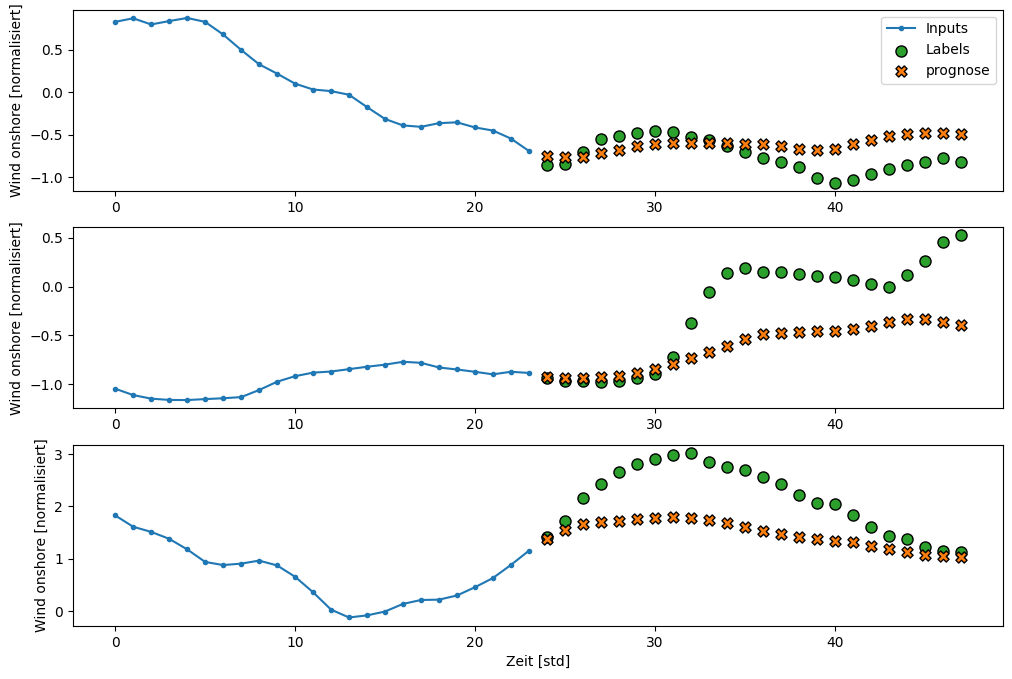

In [13]:
# Erstellt leere Dictionaries, um später die Leistung des Modells auf den Validierungs- und Testdatensätzen zu speichern.
validierungsDatensätze = {}
multiLeistung = {}

from IPython import display

# Definiert die maximale Anzahl von Trainingsepochen.
MAX_EPOCHS = 50

# Erstellt ein sequentielles LSTM-Modell mit TensorFlow Keras.
multi_lstm_model = tf.keras.Sequential([
    # Eine LSTM-Schicht mit 32 Einheiten. 'return_sequences=False' bedeutet, dass nur der letzte Output der Sequenz zurückgegeben wird.
    tf.keras.layers.LSTM(32, return_sequences=False),
    
    # Eine Dense-Schicht, die die Ausgabe des LSTM auf die gewünschte Größe bringt. 
    # 'OUT_STEPS*featuresAnzahl' definiert die Gesamtzahl der Ausgabeeinheiten.
    tf.keras.layers.Dense(OUT_STEPS*featuresAnzahl, kernel_initializer=tf.initializers.zeros()),

    # Eine Reshape-Schicht, um die Ausgabe in das gewünschte Format zu bringen, hier [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, featuresAnzahl])
])

# Trainiert das Modell mit der zuvor definierten Funktion 'kompilieren', die das Modell kompiliert und dann trainiert.
verlauf = kompilieren(multi_lstm_model, multi_window)

display.clear_output()

# Bewertet das trainierte Modell auf dem Validierungsdatensatz und speichert das Ergebnis.
validierungsDatensätze['LSTM'] = multi_lstm_model.evaluate(multi_window.val)

# Bewertet das Modell auf dem Testdatensatz und speichert das Ergebnis. 'verbose=0' unterdrückt die Ausgabe während der Evaluation.
multiLeistung['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)

multi_window.plot(multi_lstm_model)


In [38]:
complete_data.head(24)

,Air_temperature,Relative_humidity,Wind onshore,Hour,Month,Jahreszeit
Date (GMT+1),,,,,,
2014-12-31 23:00:00,NaN,NaN,8964.625,23,12,0
2015-01-01 00:00:00,NaN,NaN,9163.850,0,1,0
2015-01-01 01:00:00,1.638710,89.290323,9315.850,1,1,0
2015-01-01 02:00:00,1.577419,89.580645,9265.600,2,1,0
2015-01-01 03:00:00,1.519355,89.741935,9323.525,3,1,0
2015-01-01 04:00:00,1.461290,89.838710,9634.875,4,1,0
2015-01-01 05:00:00,1.425806,89.870968,10159.025,5,1,0
2015-01-01 06:00:00,1.393548,89.903226,10699.375,6,1,0
2015-01-01 07:00:00,1.383871,89.935484,10674.300,7,1,0


In [531]:
new_Data = complete_data.head(24).copy()

# Füllt vorwärtsgerichtete fehlende Werte (NaNs) in 'new_Data' mit dem vorhergehenden gültigen Wert auf.
new_Data.ffill(inplace=True)

# Füllt rückwärtsgerichtete fehlende Werte in 'new_Data' mit dem nachfolgenden gültigen Wert auf.
new_Data.bfill(inplace=True)

# Überprüft, ob es immer noch irgendwelche fehlenden Werte in 'new_Data' gibt.
if new_Data.isnull().any().any():
    # Berechnet den globalen Durchschnittswert für jeden Spalte in 'complete_data', falls noch NaNs vorhanden sind.
    global_mean = complete_data.mean()
    # Füllt die verbleibenden fehlenden Werte in 'new_Data' mit dem globalen Durchschnittswert.
    new_Data.fillna(global_mean, inplace=True)

# Überprüft erneut auf fehlende Werte. Gibt eine Nachricht aus, je nachdem, ob NaNs gefunden wurden oder nicht.
if new_Data.isnull().any().any():
    print("NaNs da.")
else:
    print("NaNs weg")

print(new_Data.head(24))

NaNs weg
                     Air_temperature  Relative_humidity  Wind onshore  Hour  \
Date (GMT+1)                                                                  
2014-12-31 23:00:00         1.638710          89.290323      8964.625    23   
2015-01-01 00:00:00         1.638710          89.290323      9163.850     0   
2015-01-01 01:00:00         1.638710          89.290323      9315.850     1   
2015-01-01 02:00:00         1.577419          89.580645      9265.600     2   
2015-01-01 03:00:00         1.519355          89.741935      9323.525     3   
2015-01-01 04:00:00         1.461290          89.838710      9634.875     4   
2015-01-01 05:00:00         1.425806          89.870968     10159.025     5   
2015-01-01 06:00:00         1.393548          89.903226     10699.375     6   
2015-01-01 07:00:00         1.383871          89.935484     10674.300     7   
2015-01-01 08:00:00         1.383871          89.838710     10706.325     8   
2015-01-01 09:00:00         1.474194       

In [532]:
# Auswählen der Features, die für die Prognose verwendet werden sollen.
prognoseFeatures = ["Air_temperature", "Diffuse_solar_radiation", "Relative_humidity", "Electricity_generation", "Hour", "Month", "Jahreszeit"]

# Normalisiert die ausgewählten Features in 'new_Data' mithilfe der Mittelwerte (train_mean) und Standardabweichungen (train_std) der Trainingsdaten.
# Dies stellt sicher, dass die Daten in einer ähnlichen Skala wie die Trainingsdaten vorliegen.
normalisiertDaten = (new_Data[prognoseFeatures] - train_mean[prognoseFeatures]) / train_std[prognoseFeatures]

# Reshape der normalisierten Daten in das Format, das vom LSTM-Modell erwartet wird.
# Die Form ist [Anzahl der Beispiele, Zeitfenstergröße, Anzahl der Features].
reshape = normalisiertDaten.values.reshape(1, 24, len(prognoseFeatures))

# Verwendet das trainierte LSTM-Modell, um eine Prognose basierend auf den reshaped normalisierten Daten zu erstellen.
prognose = multi_lstm_model.predict(reshape)

print(reshape)

KeyError: "['Diffuse_solar_radiation', 'Electricity_generation'] not in index"

In [ ]:
# Wendet die Denormalisierungsformel an.
index_ElectricityGeneration = prognoseFeatures.index('Electricity_generation')


denormalisiert = prognose[:, :, index_ElectricityGeneration] * train_std['Electricity_generation'] + train_mean['Electricity_generation']

# Ausgabe zur Information, dass nun denormalisierte Vorhersagen für die Stromerzeugung folgen.
print("Denormalisierte Vorhersagen für die Stromerzeugung:")

# Ersetzt negative Vorhersagewerte durch 0. Negative Werte sind in diesem Kontext (Stromerzeugung) 
# nicht sinnvoll, daher werden sie auf 0 gesetzt, um realistische Vorhersagen zu gewährleisten.
for i in range(len(denormalisiert)):
    for j in range(len(denormalisiert[i])):
        if denormalisiert[i][j] < 0:
            denormalisiert[i][j] = 0

# Druckt die denormalisierten Prognosedaten aus. Diese Daten repräsentieren die Vorhersagen 
# des Modells für die Stromerzeugung in der ursprünglichen Skala der Daten.
print(denormalisiert)


In [ ]:
#dates_times = new_Data.index

hours = new_Data.index.hour    #Plot darstellung für die GUI
with plt.style.context('dark_background'):
 plt.plot(denormalisiert.flatten(), marker='o', color = 'c')
plt.title('Prognose ab dem  ' + str(new_Data.index.date.max()) , color = 'c' )
plt.xlabel('Stunden', color = 'r')
plt.ylabel('Stromerzeugung  in MW' , color = 'r')